In [2]:
#import các thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-2-60f1f2153c55>:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [3]:
df_phone = pd.read_csv('/content/sample_data/dataset.csv')

In [4]:
df_phone.head()

,Product Name,Manufacturer,Operating System,Screen Size (inch),Battery (mAh),Main Camera (MP),RAM (GB),Internal Storage (GB),Phone Chip,Processor Speed (GHz),Price (VND)
0,Xiaomi Redmi 13C,Xiaomi,Android,6.74,5000,50,4,128,MediaTek Helio G85,2 nhân 2.0 GHz & 6 nhân 1.8 GHz,"2,890,000"
1,Xiaomi Redmi 12C (4G/64G) - Hàng Chính Hãng,Xiaomi,Android,6.70,5000,50,4,64,MediaTek Helio G85 8 nhân,2 nhân 2.0 GHz & 6 nhân 1.8 GHz,2872000
2,Xiaomi Redmi 12,Xiaomi,Android,6.79,5000,50,4,128,MediaTek Helio G88,2,"3,490,000"
3,Xiaomi 13T Pro 5G,Xiaomi,Android,6.67,5000,50,12,256,MediaTek Dimensity 9200+ 5G,"1 nhân 3.35 GHz, 3 nhân 3 GHz & 4 nhân 2 GHz","14,490,000"
4,XIAOMI 13T 5G (12GB-256GB) - Hàng chính hãng,Xiaomi,Android,6.67,5000,50,12,256,MediaTek Dimensity 8200-Ultra,"1 nhân 3.1 GHz, 3 nhân 3 GHz &amp; 4 nhân 2 GHz",11390000


In [5]:
df_phone.shape

(200, 11)

In [6]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product Name           200 non-null    object 
 1   Manufacturer           200 non-null    object 
 2   Operating System       200 non-null    object 
 3   Screen Size (inch)     200 non-null    float64
 4   Battery (mAh)          200 non-null    int64  
 5   Main Camera (MP)       200 non-null    int64  
 6   RAM (GB)               200 non-null    int64  
 7   Internal Storage (GB)  200 non-null    int64  
 8   Phone Chip             173 non-null    object 
 9   Processor Speed (GHz)  139 non-null    object 
 10  Price (VND)            200 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 17.3+ KB


Ta nhận ra cột Price (VND) mang kiểu dữ liệu object, điều này sai vì cột Price (VND) phải mang 1 giá trị số nên ta cần chỉnh sửa

In [7]:
df_phone['Price (VND)']= df_phone['Price (VND)'].str.replace(',', '')
df_phone['Price (VND)'] = pd.to_numeric(df_phone['Price (VND)'], errors='coerce')

In [8]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product Name           200 non-null    object 
 1   Manufacturer           200 non-null    object 
 2   Operating System       200 non-null    object 
 3   Screen Size (inch)     200 non-null    float64
 4   Battery (mAh)          200 non-null    int64  
 5   Main Camera (MP)       200 non-null    int64  
 6   RAM (GB)               200 non-null    int64  
 7   Internal Storage (GB)  200 non-null    int64  
 8   Phone Chip             173 non-null    object 
 9   Processor Speed (GHz)  139 non-null    object 
 10  Price (VND)            200 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 17.3+ KB


In [9]:
missing_values = df_phone.isnull().sum()

# Tổng số giá trị khuyết trong toàn bộ bộ dữ liệu
total_missing_values = df_phone.isnull().sum().sum()

# In thông tin về giá trị khuyết
print("Số lượng giá trị khuyết cho mỗi cột:\n", missing_values)
print("\nTổng số giá trị khuyết trong toàn bộ bộ dữ liệu:", total_missing_values)

Số lượng giá trị khuyết cho mỗi cột:
 Product Name             0 
Manufacturer             0 
Operating System         0 
Screen Size (inch)       0 
Battery (mAh)            0 
Main Camera (MP)         0 
RAM (GB)                 0 
Internal Storage (GB)    0 
Phone Chip               27
Processor Speed (GHz)    61
Price (VND)              0 
dtype: int64

Tổng số giá trị khuyết trong toàn bộ bộ dữ liệu: 88


<ipython-input-10-665358ad30b5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_phone.corr())


<function matplotlib.pyplot.show(close=None, block=None)>

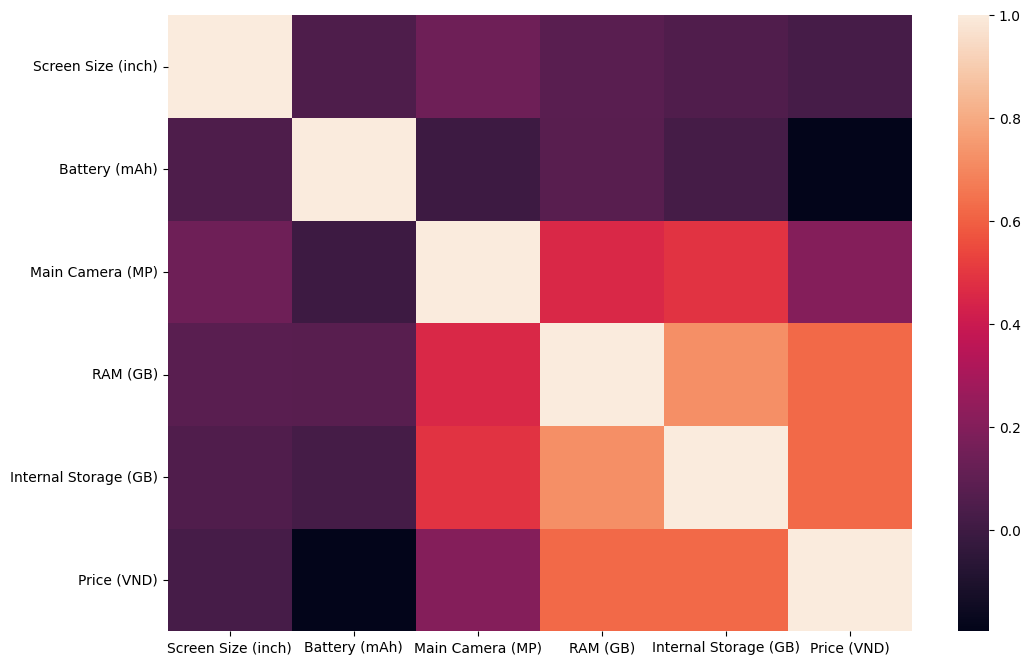

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_phone.corr())
plt.show

Ta nhận thấy có thứ tự tương quan giữa các price và các biến còn lại như sau: RAM > Internal Storage > Screen Size, Main Camera, battery

<function matplotlib.pyplot.show(close=None, block=None)>

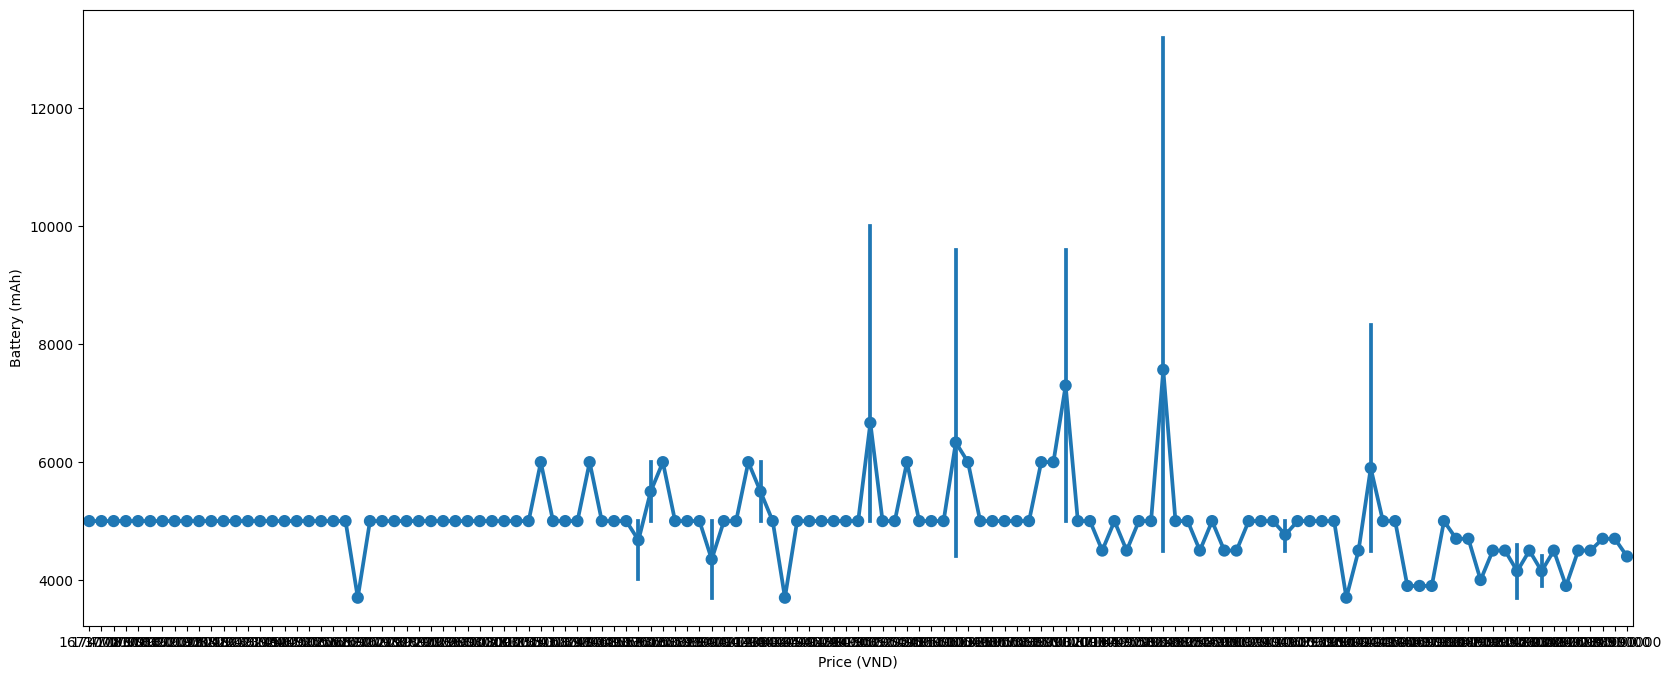

In [11]:
plt.figure(figsize=(20, 8))
sns.pointplot(y="Battery (mAh)", x="Price (VND)", data=df_phone)
plt.show

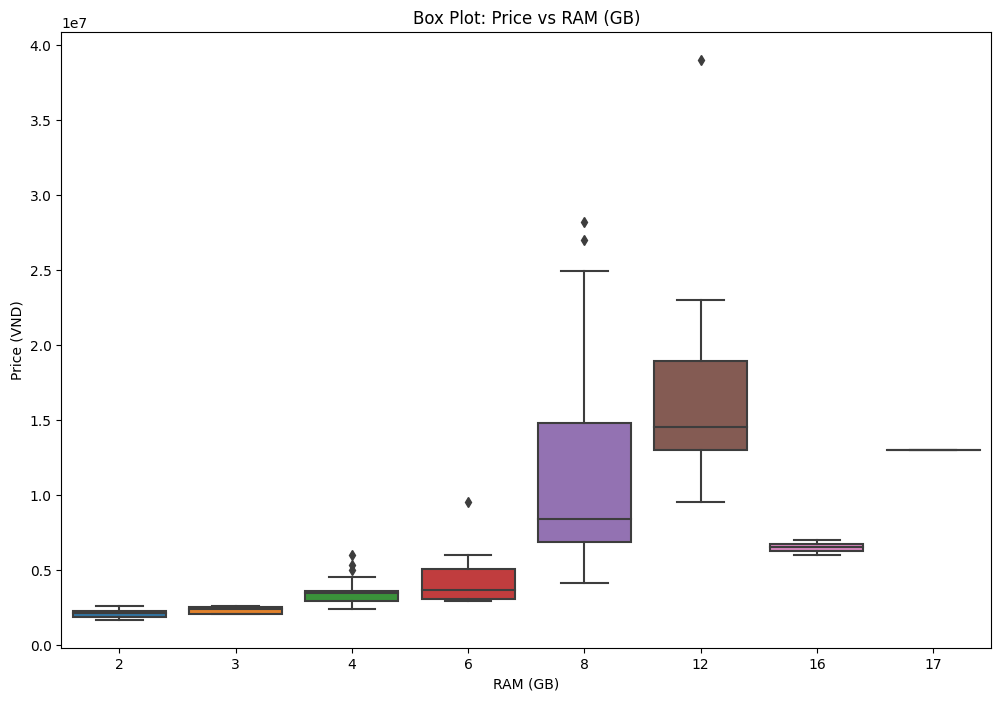

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='RAM (GB)', y='Price (VND)', data=df_phone)
plt.title('Box Plot: Price vs RAM (GB)')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (VND)')
plt.show()

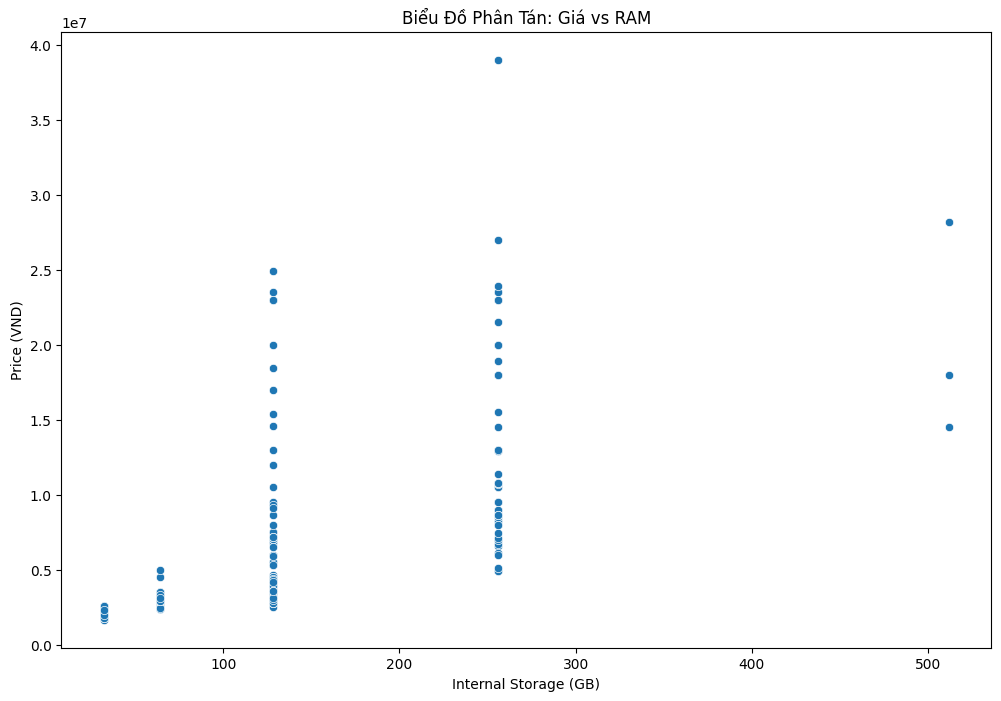

In [13]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Internal Storage (GB)', y='Price (VND)', data=df_phone)
plt.title('Biểu Đồ Phân Tán: Giá vs RAM')
plt.show()

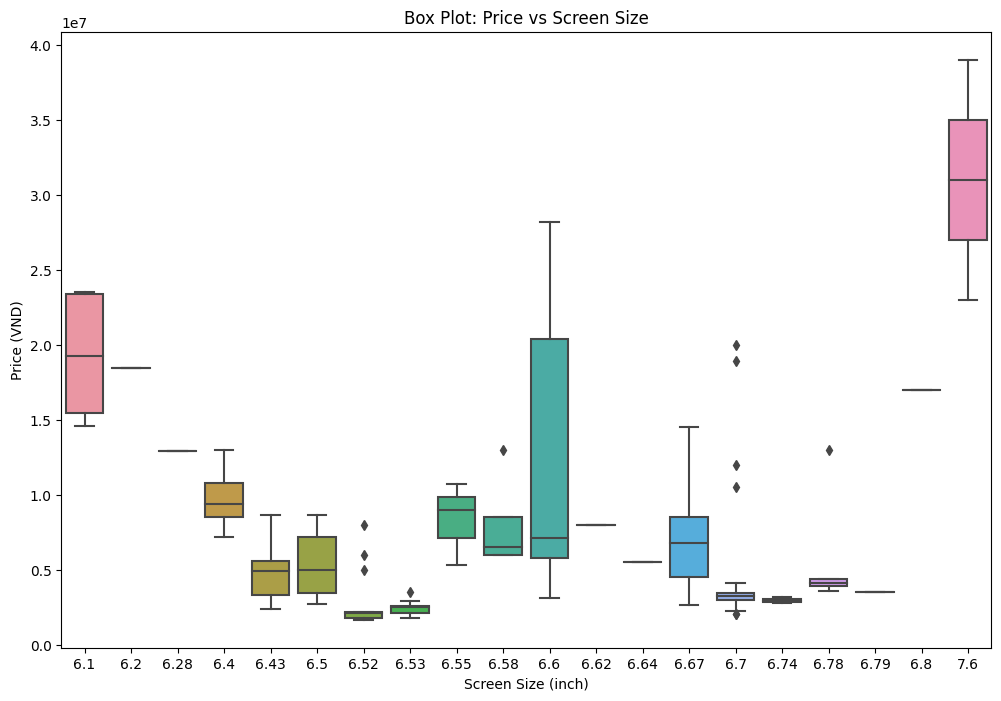

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Screen Size (inch)', y='Price (VND)', data=df_phone)
plt.title('Box Plot: Price vs Screen Size')
plt.xlabel('Screen Size (inch)')
plt.ylabel('Price (VND)')
plt.show()

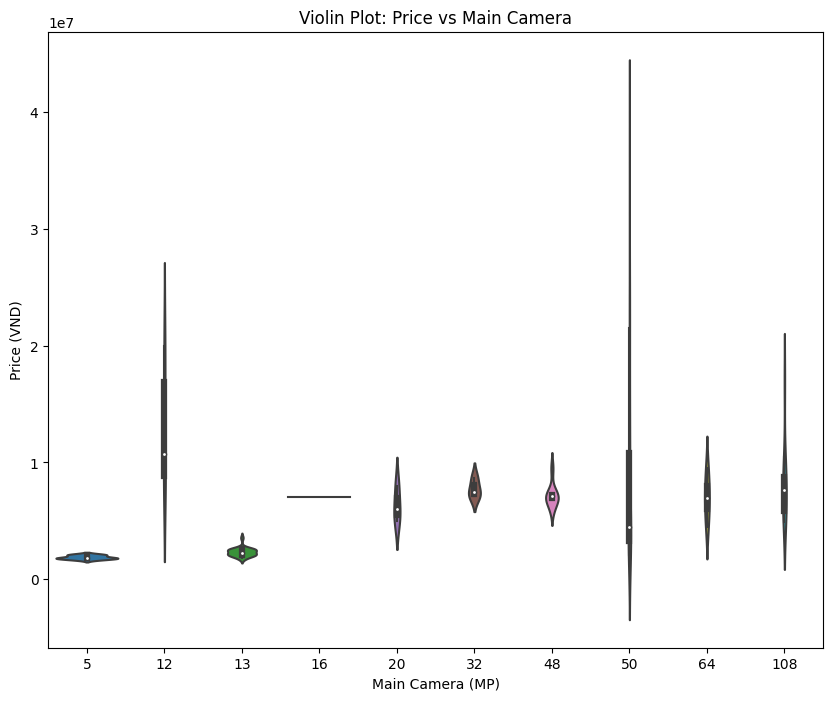

In [15]:
# Tạo violin plot
plt.figure(figsize=(10, 8))
sns.violinplot(x='Main Camera (MP)', y='Price (VND)', data=df_phone)

# Đặt tên trục và tiêu đề
plt.xlabel('Main Camera (MP)')
plt.ylabel('Price (VND)')
plt.title('Violin Plot: Price vs Main Camera')

# Hiển thị biểu đồ
plt.show()

In [16]:
# Giữ lại các cột mong muốn
selected_columns = ['Screen Size (inch)', 'Battery (mAh)', 'Main Camera (MP)', 'RAM (GB)', 'Internal Storage (GB)', 'Price (VND)']
df_predict = df_phone[selected_columns]


# Hiển thị 5 dòng đầu của bộ dữ liệu đã chọn
df_predict.head()

,Screen Size (inch),Battery (mAh),Main Camera (MP),RAM (GB),Internal Storage (GB),Price (VND)
0,6.74,5000,50,4,128,2890000
1,6.70,5000,50,4,64,2872000
2,6.79,5000,50,4,128,3490000
3,6.67,5000,50,12,256,14490000
4,6.67,5000,50,12,256,11390000


In [17]:
df_predict.dtypes

Screen Size (inch)       float64
Battery (mAh)            int64  
Main Camera (MP)         int64  
RAM (GB)                 int64  
Internal Storage (GB)    int64  
Price (VND)              int64  
dtype: object

Ta nhận ra cột Price (VND) mang kiểu dữ liệu object, điều này sai vì cột Price (VND) phải mang 1 giá trị số nên ta cần chỉnh sửa

In [18]:
df_predict

,Screen Size (inch),Battery (mAh),Main Camera (MP),RAM (GB),Internal Storage (GB),Price (VND)
0,6.74,5000,50,4,128,2890000
1,6.70,5000,50,4,64,2872000
2,6.79,5000,50,4,128,3490000
3,6.67,5000,50,12,256,14490000
4,6.67,5000,50,12,256,11390000
5,6.67,5000,50,8,256,10490000
6,6.55,4500,50,8,256,8990000
7,6.64,5000,50,8,128,5490000
8,6.62,4500,64,8,256,7990000
9,6.55,5000,50,4,128,5290000


tạo 2 lớp dữ liệu X và Y

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [20]:
X = df_predict.drop(['Price (VND)'], axis=1).to_numpy()
Y = df_predict['Price (VND)'].to_numpy()

In [21]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# In kích thước của tập huấn luyện và tập kiểm tra
print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape)
print("Kích thước nhãn tập huấn luyện:", Y_train.shape)
print("Kích thước nhãn tập kiểm tra:", Y_test.shape)

Kích thước tập huấn luyện: (160, 5)
Kích thước tập kiểm tra: (40, 5)
Kích thước nhãn tập huấn luyện: (160,)
Kích thước nhãn tập kiểm tra: (40,)


Sử dụng mô hình Linear Regression

In [22]:
lm = LinearRegression()
lm.fit(X_train, Y_train)


LinearRegression()

In [23]:
lm.score(X_train,Y_train)

0.5635357194913029

In [24]:
lm.score(X_test, Y_test)

0.37623935419305155

<ipython-input-49-93a3eaf3c19f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k, label='Actual Price', color='b')
<ipython-input-49-93a3eaf3c19f>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred_lm, label='Linear Regression Predicted Price', color='r')


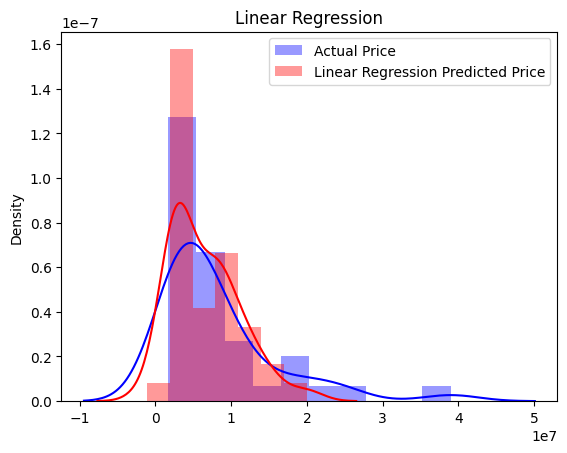

In [49]:
y_test_pred_lm = lm.predict(X_test)

# Sort the indices
inds = np.argsort(Y_test)
k = Y_test[inds]
y_test_pred = y_test_pred_lm[inds]
sns.distplot(k, label='Actual Price', color='b')
sns.distplot(y_test_pred_lm, label='Linear Regression Predicted Price', color='r')
plt.legend()
plt.title('Linear Regression')
plt.show()

Sử dụng mô hình KNeighborsRegressor

In [26]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(X_train,Y_train)

KNeighborsRegressor()

In [27]:
knr.score(X_train, Y_train)

0.7799555081531906

In [28]:
knr.score(X_test, Y_test)

0.6884701250624508

<ipython-input-50-cffec04a63cd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k, label='Actual Price', color='b')
<ipython-input-50-cffec04a63cd>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred_knr, label='KNN Predicted Price', color='r')


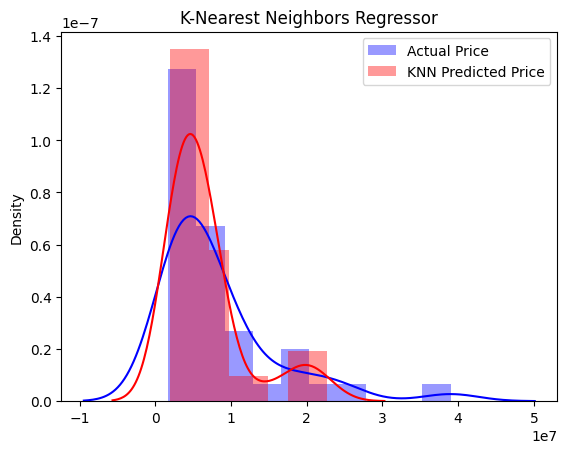

In [50]:
y_test_pred_knr = knr.predict(X_test)
y_test_pred_knr = y_test_pred_knr[inds]
sns.distplot(k, label='Actual Price', color='b')
sns.distplot(y_test_pred_knr, label='KNN Predicted Price', color='r')
plt.legend()
plt.title('K-Nearest Neighbors Regressor')
plt.show()

Sử dụng mô hình DecisionTreeRegressor

In [30]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [31]:
dtree.score(X_train, Y_train)

0.9698508686732631

In [32]:
dtree.score(X_test, Y_test)

0.7476917012267172

<ipython-input-51-1b75bb5c0bb0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k, label='Actual Price', color='b')
<ipython-input-51-1b75bb5c0bb0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred_dtree, label='DT Predicted Price', color='r')


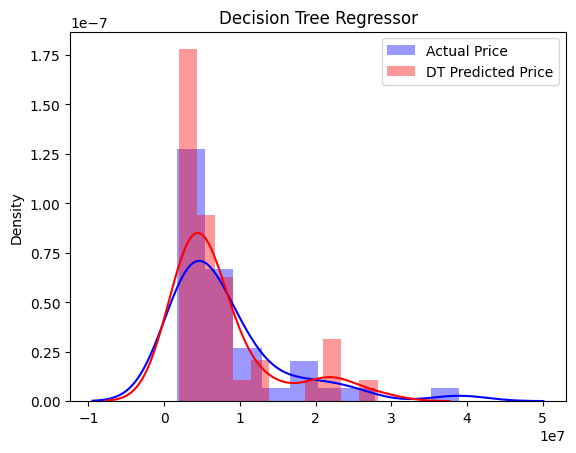

In [51]:
y_test_pred_dtree = dtree.predict(X_test)
y_test_pred_dtree = y_test_pred_dtree[inds]
# Plotting using seaborn distplot
sns.distplot(k, label='Actual Price', color='b')
sns.distplot(y_test_pred_dtree, label='DT Predicted Price', color='r')
plt.legend()
plt.title('Decision Tree Regressor')
plt.show()